# Подготовка

In [4]:
import sklearn.tree as tree
import sklearn.model_selection as skmodel
import sklearn.metrics as metrics
import sklearn.ensemble as ensemble
import sklearn.linear_model as linear
import sklearn.neighbors as neighbors
import sklearn.model_selection as model
import xgboost as xgb
import imblearn.over_sampling as oversampling
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections as cl

In [5]:
data_regression = pd.read_csv("../preprocessed/regression_preprocessed.csv")
X_reg = data_regression.drop("price", axis=1)
Y_reg = data_regression.loc[:, "price"]
data_regression

,carat,cut,depth,table,price,x,y,z,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,5,61.5,55.0,326,3.95,3.98,2.43,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,4,59.8,61.0,326,3.89,3.84,2.31,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,2,56.9,65.0,327,4.05,4.07,2.31,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.29,4,62.4,58.0,334,4.20,4.23,2.63,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,2,63.3,58.0,335,4.34,4.35,2.75,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,60.8,57.0,2757,5.75,5.76,3.50,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,2,63.1,55.0,2757,5.69,5.75,3.61,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,3,62.8,60.0,2757,5.66,5.68,3.56,1,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,4,61.0,58.0,2757,6.15,6.12,3.74,0,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
data_classification = pd.read_csv("../preprocessed/classification_preprocessed.csv")
X_class = data_classification.drop("Win_Probability", axis=1)
Y_class = data_classification.loc[:, "Win_Probability"]
X_class, Y_class = oversampling.SMOTE().fit_resample(X_class, Y_class)
X_class.shape, Y_class.shape

((283935, 2), (283935,))

In [7]:
data_classification

,Character_1,Character_2,Win_Probability
0,558,11880,-1
1,4687,6887,-1
2,3954,6775,-1
3,1009,10302,0
4,6389,6454,-1
...,...,...,...
198672,6299,4460,-1
198673,1386,1917,-1
198674,572,4460,-1
198675,3010,4460,-1


In [8]:
X_reg_train, X_reg_test, Y_reg_train, Y_reg_test = skmodel.train_test_split(X_reg, Y_reg, random_state=14)
X_class_train, X_class_test, Y_class_train, Y_class_test = skmodel.train_test_split(X_class, Y_class, random_state=14)

# Задание 1

In [9]:
tree_regression_model = tree.DecisionTreeRegressor(max_depth=5).fit(X_reg_train, Y_reg_train)

tree_regression_prediction = tree_regression_model.predict(X_reg_test)

In [10]:
print(metrics.mean_absolute_error(Y_reg_test, tree_regression_prediction),
      metrics.r2_score(Y_reg_test, tree_regression_prediction),
      sep="\n")

646.1498831943304
0.9130261302011216


In [11]:
print(tree.export_text(tree_regression_model))

|--- feature_0 <= 1.00
|   |--- feature_5 <= 5.54
|   |   |--- feature_5 <= 4.99
|   |   |   |--- feature_4 <= 4.62
|   |   |   |   |--- feature_4 <= 4.30
|   |   |   |   |   |--- value: [579.36]
|   |   |   |   |--- feature_4 >  4.30
|   |   |   |   |   |--- value: [740.70]
|   |   |   |--- feature_4 >  4.62
|   |   |   |   |--- feature_20 <= 0.50
|   |   |   |   |   |--- value: [939.55]
|   |   |   |   |--- feature_20 >  0.50
|   |   |   |   |   |--- value: [1194.64]
|   |   |--- feature_5 >  4.99
|   |   |   |--- feature_17 <= 0.50
|   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |--- value: [1869.18]
|   |   |   |   |--- feature_16 >  0.50
|   |   |   |   |   |--- value: [1441.46]
|   |   |   |--- feature_17 >  0.50
|   |   |   |   |--- feature_0 <= 0.64
|   |   |   |   |   |--- value: [1185.74]
|   |   |   |   |--- feature_0 >  0.64
|   |   |   |   |   |--- value: [1877.07]
|   |--- feature_5 >  5.54
|   |   |--- feature_0 <= 0.88
|   |   |   |--- feature_5 <= 5.72
|   

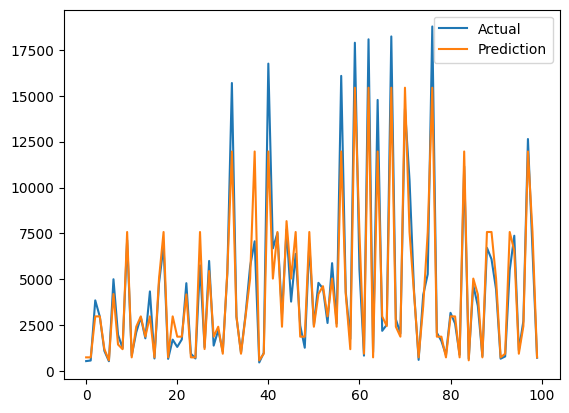

In [12]:
plt.plot(Y_reg_test.to_numpy()[:100], label="Actual");
plt.plot(tree_regression_prediction[:100], label="Prediction");
plt.legend();

In [13]:
tree_classification_model = tree.DecisionTreeClassifier().fit(X_class_train, Y_class_train)

tree_classification_prediction = tree_classification_model.predict(X_class_test)

In [14]:
print(metrics.classification_report(Y_class_test.to_numpy(), tree_classification_prediction))

              precision    recall  f1-score   support

          -1       0.80      0.82      0.81     23849
           0       0.87      0.84      0.85     23611
           1       0.81      0.83      0.82     23524

    accuracy                           0.83     70984
   macro avg       0.83      0.83      0.83     70984
weighted avg       0.83      0.83      0.83     70984



In [15]:
print(tree.export_text(tree_classification_model))

|--- feature_0 <= 11879.50
|   |--- feature_1 <= 8475.50
|   |   |--- feature_1 <= 8434.50
|   |   |   |--- feature_0 <= 2980.50
|   |   |   |   |--- feature_1 <= 94.50
|   |   |   |   |   |--- feature_0 <= 1293.00
|   |   |   |   |   |   |--- feature_0 <= 61.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  61.00
|   |   |   |   |   |   |   |--- feature_0 <= 209.00
|   |   |   |   |   |   |   |   |--- feature_1 <= 10.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_1 >  10.50
|   |   |   |   |   |   |   |   |   |--- feature_0 <= 70.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_0 >  70.50
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 104.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  104.50
|   |   |   |   |   |   |   |   |   |   |   |--- tr

# Задание 2

## Bagging

In [16]:
bagging_regression_model = ensemble.BaggingRegressor().fit(X_reg_train, Y_reg_train)

bagging_regression_prediction = bagging_regression_model.predict(X_reg_test)

In [17]:
print(metrics.mean_absolute_error(Y_reg_test, bagging_regression_prediction),
      metrics.r2_score(Y_reg_test, bagging_regression_prediction),
      sep="\n")

290.9336031216343
0.9779890337438218


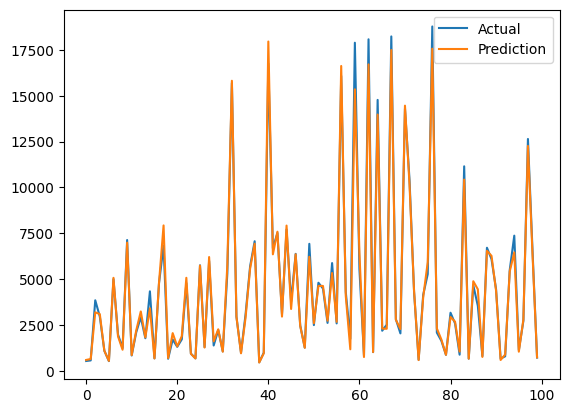

In [18]:
plt.plot(Y_reg_test.to_numpy()[:100], label="Actual");
plt.plot(bagging_regression_prediction[:100], label="Prediction");
plt.legend();

In [19]:
bagging_classification_model = ensemble.BaggingClassifier().fit(X_class_train, Y_class_train)

bagging_classification_prediction = bagging_classification_model.predict(X_class_test)

In [20]:
print(metrics.classification_report(Y_class_test, bagging_classification_prediction))

              precision    recall  f1-score   support

          -1       0.80      0.84      0.82     23849
           0       0.89      0.87      0.88     23611
           1       0.82      0.81      0.82     23524

    accuracy                           0.84     70984
   macro avg       0.84      0.84      0.84     70984
weighted avg       0.84      0.84      0.84     70984



## Boosting

In [21]:
boosting_regression_model = ensemble.GradientBoostingRegressor().fit(X_reg_train, Y_reg_train)

boosting_regression_prediction = boosting_regression_model.predict(X_reg_test)

In [22]:
print(metrics.mean_absolute_error(Y_reg_test, boosting_regression_prediction),
      metrics.r2_score(Y_reg_test, boosting_regression_prediction),
      sep="\n")

408.3586074485245
0.965905627736658


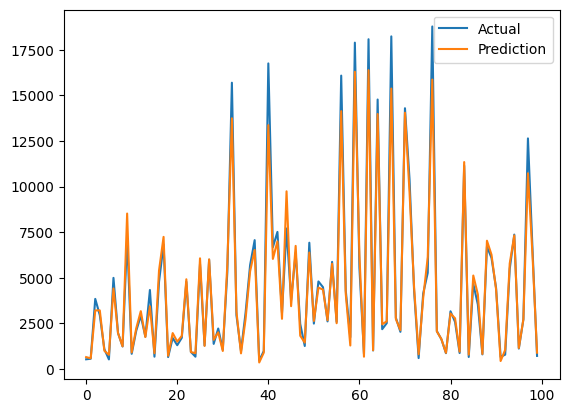

In [23]:
plt.plot(Y_reg_test.to_numpy()[:100], label="Actual");
plt.plot(boosting_regression_prediction[:100], label="Prediction");
plt.legend();

In [24]:
boosting_classification_model = ensemble.GradientBoostingClassifier().fit(X_class_train, Y_class_train)

boosting_classification_prediction = boosting_classification_model.predict(X_class_test)

In [25]:
print(metrics.classification_report(Y_class_test, bagging_classification_prediction))

              precision    recall  f1-score   support

          -1       0.80      0.84      0.82     23849
           0       0.89      0.87      0.88     23611
           1       0.82      0.81      0.82     23524

    accuracy                           0.84     70984
   macro avg       0.84      0.84      0.84     70984
weighted avg       0.84      0.84      0.84     70984



## Stacking

In [26]:
stacking_regression_model = ensemble.StackingRegressor(cv=3, estimators=[("ridge", linear.RidgeCV()), ("tree", tree.DecisionTreeRegressor())]).fit(X_reg_train, Y_reg_train)

stacking_regression_prediction = stacking_regression_model.predict(X_reg_test)

In [27]:
print(metrics.mean_absolute_error(Y_reg_test, bagging_regression_prediction),
      metrics.r2_score(Y_reg_test, bagging_regression_prediction),
      sep="\n")

290.9336031216343
0.9779890337438218


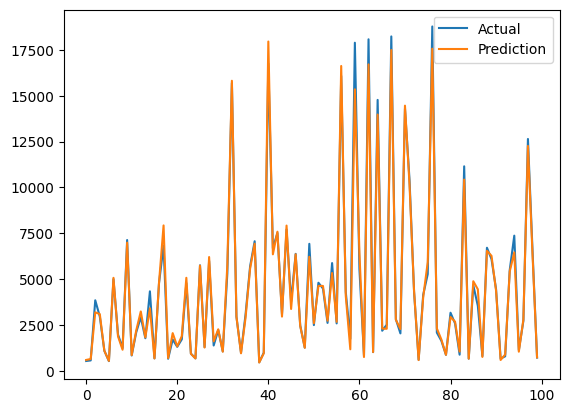

In [28]:
plt.plot(Y_reg_test.to_numpy()[:100], label="Actual");
plt.plot(bagging_regression_prediction[:100], label="Prediction");
plt.legend();

In [29]:
stacking_classification_model = ensemble.StackingClassifier(cv=3, estimators=[("neighbors", neighbors.KNeighborsClassifier(weights="distance")), ("tree", tree.DecisionTreeClassifier())]).fit(X_class_train, Y_class_train)

stacking_classification_prediction = stacking_classification_model.predict(X_class_test)

In [30]:
print(metrics.classification_report(Y_class_test, stacking_classification_prediction))

              precision    recall  f1-score   support

          -1       0.83      0.84      0.83     23849
           0       0.90      0.88      0.89     23611
           1       0.83      0.83      0.83     23524

    accuracy                           0.85     70984
   macro avg       0.85      0.85      0.85     70984
weighted avg       0.85      0.85      0.85     70984



# Задание 3

In [31]:
tree_method: str = {"0": "hist", "1": "gpu_hist"}.get(input())
xgb_regression_model = model.RandomizedSearchCV(xgb.XGBRegressor(), {"max_depth": np.arange(2, 20, 1), "n_estimators": np.arange(15, 100, 5), "tree_method": [tree_method]}, cv=3).fit(X_reg_train, Y_reg_train)

xgb_regression_prediction = xgb_regression_model.predict(X_reg_test)
xgb_regression_model.best_params_

{'tree_method': 'hist', 'n_estimators': 45, 'max_depth': 7}

In [32]:
print(metrics.mean_absolute_error(Y_reg_test, xgb_regression_prediction),
      metrics.r2_score(Y_reg_test, xgb_regression_prediction),
      sep="\n")

295.8828882542017
0.9789265226578707


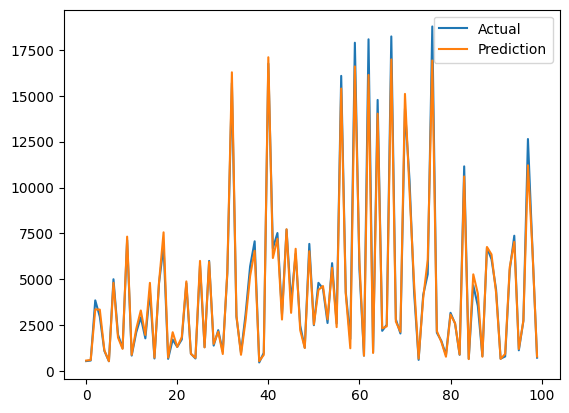

In [33]:
plt.plot(Y_reg_test.to_numpy()[:100], label="Actual");
plt.plot(xgb_regression_prediction[:100], label="Prediction");
plt.legend();

In [34]:
Y_class_train_relabeled = Y_class_train.apply(lambda x: x + 1)
xgb_classification_model = model.RandomizedSearchCV(xgb.XGBClassifier(), {"max_depth": np.arange(2, 20, 1), "n_estimators": np.arange(15, 100, 5), "tree_method": [tree_method]}, cv=3).fit(X_class_train, Y_class_train_relabeled)

xgb_classification_prediction = xgb_classification_model.predict(X_class_test)
xgb_classification_model.best_params_

{'tree_method': 'hist', 'n_estimators': 50, 'max_depth': 18}

In [35]:
print(metrics.classification_report(Y_class_test, xgb_classification_prediction - 1))

              precision    recall  f1-score   support

          -1       0.62      0.57      0.59     23849
           0       0.70      0.80      0.74     23611
           1       0.60      0.57      0.59     23524

    accuracy                           0.64     70984
   macro avg       0.64      0.64      0.64     70984
weighted avg       0.64      0.64      0.64     70984



In [36]:
matrix_train = xgb.DMatrix(X_class_train, Y_class_train_relabeled)
matrix_test = xgb.DMatrix(X_class_test, Y_class_test.apply(lambda x: x + 1))

iterations: int = 8000 if tree_method == "gpu_hist" else 800
matrix_booster = xgb.train({"objective": "multi:softmax", "num_class": 3, "tree_method": tree_method}, matrix_train, iterations, evals=[(matrix_test, "test")])

[0]	test-mlogloss:1.09614
[1]	test-mlogloss:1.09433
[2]	test-mlogloss:1.09285
[3]	test-mlogloss:1.09153
[4]	test-mlogloss:1.09008
[5]	test-mlogloss:1.08915
[6]	test-mlogloss:1.08782
[7]	test-mlogloss:1.08679
[8]	test-mlogloss:1.08568
[9]	test-mlogloss:1.08492
[10]	test-mlogloss:1.08368
[11]	test-mlogloss:1.08261
[12]	test-mlogloss:1.08183
[13]	test-mlogloss:1.08094
[14]	test-mlogloss:1.07981
[15]	test-mlogloss:1.07871
[16]	test-mlogloss:1.07766
[17]	test-mlogloss:1.07689
[18]	test-mlogloss:1.07575
[19]	test-mlogloss:1.07480
[20]	test-mlogloss:1.07404
[21]	test-mlogloss:1.07327
[22]	test-mlogloss:1.07202
[23]	test-mlogloss:1.07122
[24]	test-mlogloss:1.07057
[25]	test-mlogloss:1.06962
[26]	test-mlogloss:1.06875
[27]	test-mlogloss:1.06790
[28]	test-mlogloss:1.06723
[29]	test-mlogloss:1.06641
[30]	test-mlogloss:1.06579
[31]	test-mlogloss:1.06524
[32]	test-mlogloss:1.06450
[33]	test-mlogloss:1.06381
[34]	test-mlogloss:1.06288
[35]	test-mlogloss:1.06226
[36]	test-mlogloss:1.06150
[37]	test-m

In [37]:
matrix_prediction = matrix_booster.predict(matrix_test)

print(metrics.classification_report(Y_class_test, matrix_prediction - 1))

              precision    recall  f1-score   support

          -1       0.56      0.52      0.54     23849
           0       0.64      0.72      0.68     23611
           1       0.54      0.52      0.53     23524

    accuracy                           0.58     70984
   macro avg       0.58      0.58      0.58     70984
weighted avg       0.58      0.58      0.58     70984



In [136]:
from typing import SupportsIndex, Union, Hashable, Callable, Optional, Literal
from typing_extensions import Self
from abc import abstractmethod, ABCMeta # for interfaces

class Branching: # just a structure
    def __init__(self, split_index: int, split_value: float, children: dict[bool, "_TreeNode"]) -> None:
        self.split_index = split_index
        self.split_value = split_value
        self.children = children

class _TreeNode(metaclass=ABCMeta):
    @abstractmethod
    def next(self) -> Union[Hashable, Branching]:
        raise NotImplementedError

class _TreeLeaf(_TreeNode):
    def __init__(self, value: Optional[Hashable] = None) -> None:
        self.value = value
    
    def next(self) -> Hashable:
        return self.value

class _TreeBranch(_TreeNode):
    def __init__(
            self,
            split_index: int,
            split_value: float,
            children: dict[bool, Optional[_TreeNode]]
        ) -> None:
        self.split_index = split_index
        self.split_value = split_value
        self.children = children

    def next(self) -> Branching:
        return Branching(self.split_index, self.split_value, self.children)

class _DecisionTree(metaclass=ABCMeta):
    def __init__(self) -> None:
        self.root_node: Optional[_TreeNode] = None
    
    @abstractmethod
    def fit(self, X: np.ndarray, Y: np.ndarray) -> Self:
        raise NotImplementedError
    
    @abstractmethod
    def predict(self, X: np.ndarray) -> Hashable:
        raise NotImplementedError

    @abstractmethod
    def tree_visualization(self) -> None:
        raise NotImplementedError

class DecisionTreeRegressor(_DecisionTree):
    def __init__(self, max_depth: Optional[int] = None, min_features: int = 3) -> None:
        super().__init__()
        self.max_depth = max_depth
        self.min_features = min_features

    def _best_value(self, Y: np.ndarray) -> float:
        value = np.mean(Y)
        return value
    
    def _mse(self, value: float, X: np.ndarray, Y: np.ndarray) -> float:
        Y_split = Y[np.argwhere(X == value)].mean()
        error = np.sum(np.subtract(Y, Y_split)**2) / Y.shape[0]
        return error
    
    def _best_split(self, X: np.ndarray, Y: np.ndarray) -> tuple[int, float]:
        best_mse: float = -1
        for index in range(X.shape[1]):
            column = X.T[index]
            values = np.unique(column)
            for value in values:
                mse = self._mse(value, values, Y)
                if mse < best_mse or best_mse == -1:
                    best_mse = mse
                    best_feature_index = index
                    best_split_value = value
        result = (best_feature_index, best_split_value)
        return result

    def _create_nodes(self, depth: int, X: np.ndarray, Y: np.ndarray) -> _TreeNode:
        split_index, split_value = self._best_split(X, Y)
        split = X.T[split_index] >= split_value
        children = dict(((False, None), (True, None)))
        for key in children.keys():
            Y_slice = Y[np.argwhere(split == key)].reshape(-1)
            if Y_slice.shape[0] == 0:
                best_value = self._best_value(Y)
                return _TreeLeaf(best_value)
            elif Y_slice.shape[0] < self.min_features or depth == self.max_depth:
                # create leaf node
                best_value = self._best_value(Y_slice)
                children[key] = _TreeLeaf(best_value)
            else:
                # create branch node
                X_slice = X[np.argwhere(split == key)].reshape(-1, X.shape[1])
                children[key] = self._create_nodes(depth + 1, X_slice, Y_slice)
        return _TreeBranch(split_index, split_value, children)
    
    def _search(self, X: np.ndarray, node: _TreeNode) -> float:
        node_value = node.next()
        if isinstance(node_value, Branching):
            key = X[node_value.split_index] >= node_value.split_value
            return self._search(X, node_value.children[key])
        else:
            return node_value
    
    def fit(self, X: np.ndarray, Y: np.ndarray) -> Self:
        Y = Y.reshape(-1)
        self.root_node: _TreeBranch = self._create_nodes(0, X, Y)
        return self
    
    def predict(self, X: np.ndarray) -> float:
        result = np.empty(X.shape[0])
        for i in range(result.shape[0]):
            result[i] = self._search(X[i], self.root_node)
        return result
    
    def _node_visualization(self, node: _TreeNode, depth: int) -> None:
        if isinstance(node, _TreeBranch):
            print("-|" * (depth + 1), f"feature {node.split_index} >= {node.split_value}")
            for next_node in node.children.values():
                self._node_visualization(next_node, depth + 1)
        else:
            print("-|" * (depth + 1) + "--", node.value)

    def tree_visualization(self) -> None:
        self._node_visualization(self.root_node, 0)

class DecisionTreeClassifier(_DecisionTree):
    def __init__(self) -> None:
        super().__init__()
    
    def fit(self, X: np.ndarray, Y: np.ndarray) -> Self:
        raise NotImplementedError
    
    def predict(self, X: np.ndarray) -> Hashable:
        raise NotImplementedError
    
    def tree_visualization(self) -> None:
        raise NotImplementedError

In [141]:
tree_ = DecisionTreeRegressor(5)
tree_.fit(X_reg_train.to_numpy(), Y_reg_train.to_numpy())

In [142]:
tree_prediction_ = tree_.predict(X_reg_test.to_numpy())
print(tree_prediction_)

[  779.72445141   779.72445141  4537.3857646  ... 10071.45039111
 10071.45039111  4537.3857646 ]


In [143]:
tree_.tree_visualization()

-| feature 4 >= 7.06
-|-| feature 2 >= 70.6
-|-|-| feature 4 >= 5.35
-|-|-|-| feature 2 >= 66.7
-|-|-|-|-| feature 2 >= 66.6
-|-|-|-|-|-| feature 4 >= 4.89
-|-|-|-|-|-|-|-- 779.7244514106583
-|-|-|-|-|-|-|-- 1602.9333055439768
-|-|-|-|-|-|-- 860.0
-|-|-|-|-| feature 6 >= 3.61
-|-|-|-|-|-| feature 2 >= 68.4
-|-|-|-|-|-|-|-- 978.9375
-|-|-|-|-|-|-|-- 684.5
-|-|-|-|-|-|-- 1896.0
-|-|-|-| feature 0 >= 0.51
-|-|-|-|-| feature 0 >= 0.5
-|-|-|-|-|-| feature 1 >= 4.0
-|-|-|-|-|-|-|-- 1215.3333333333333
-|-|-|-|-|-|-|-- 949.0
-|-|-|-|-|-|-- 1634.0
-|-|-|-|-| feature 0 >= 0.54
-|-|-|-|-|-| feature 0 >= 0.53
-|-|-|-|-|-|-|-- 1528.111111111111
-|-|-|-|-|-|-|-- 1745.2
-|-|-|-|-|-| feature 0 >= 0.57
-|-|-|-|-|-|-|-- 1814.132743362832
-|-|-|-|-|-|-|-- 4537.385764598955
-|-|-| feature 0 >= 0.99
-|-|-|-|-- 1854.4444444444443
-|-|-|-| feature 0 >= 1.03
-|-|-|-|-|-- 3093.5
-|-|-|-|-|-- 2815.0
-|-| feature 0 >= 1.58
-|-|-| feature 2 >= 67.2
-|-|-|-| feature 0 >= 1.24
-|-|-|-|-|-- 6201.285714285715
-|-|-|-

In [144]:
metrics.r2_score(Y_reg_test, tree_prediction_)

0.7894558511342754